## ДЗ 6
## Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.


In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from hmmlearn.hmm import GaussianHMM
import re
import seaborn as sns

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

### Возьмем ряд по месячным продажам машин в Квебеке

In [57]:
series = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")['Count']

# Дифференцируем, чтобы убрать тренд
series_diff = np.diff(series, 1)

In [58]:
# Разделим на train test для проверки качества модели
d_point = 90
train_values = series_diff[:d_point].reshape(-1, 1)
test_values = series_diff[d_point:].reshape(-1, 1)

In [59]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(train_values)
    print (n, model.score(train_values))

1 -856.9392770403864
2 -854.1947484314891
3 -847.1346493916537
4 -836.153994265292
5 -827.48876443763
6 -821.5126881186815
7 -815.8347989213752


Fitting a model with 98 free scalar parameters with only 90 data points will result in a degenerate solution.


8 -805.6191557186231


Fitting a model with 119 free scalar parameters with only 90 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 90 data points will result in a degenerate solution.


9 -794.0698347706257
10 -796.3472463462948


Fitting a model with 167 free scalar parameters with only 90 data points will result in a degenerate solution.


11 -783.2758285226973


Fitting a model with 194 free scalar parameters with only 90 data points will result in a degenerate solution.


12 -764.3687396095687
13 -772.1858675531093


после 7 компонент качество модели ухудшается. поэтому возьмем 7

In [60]:
# обучим модель
model = GaussianHMM(n_components=7,
                        covariance_type="full",
                        n_iter=2000)
model.fit(train_values)
labels = model.predict(train_values)
means = np.zeros_like(train_values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]


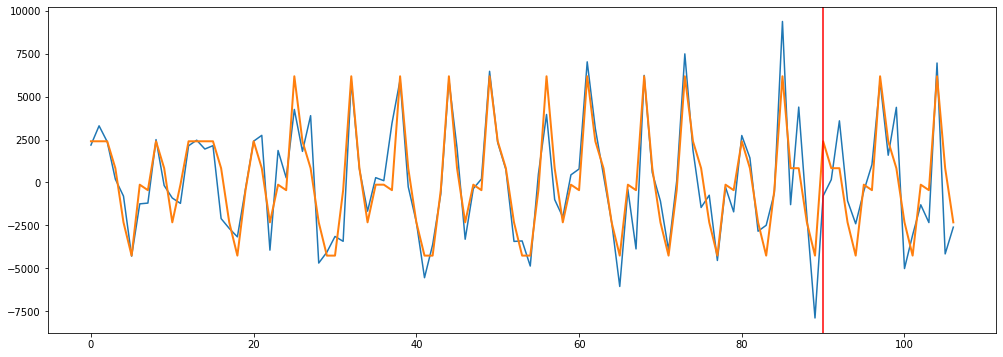

In [61]:
# Построим предсказание
predicted_labels = model.predict(test_values)
predicted_means = np.zeros_like(test_values)

for i in range(model.n_components):
    predicted_means[predicted_labels == i] = model.means_[i]
    
means_concatenated = np.concatenate([means, predicted_means])
plt.figure(figsize=(17, 6))
plt.plot(series_diff)
plt.plot(means_concatenated, linewidth=2)
plt.axvline(x=d_point, color='red')
plt.show()

### Посмотрим качество модели

Качество модели на тесте хорошее

In [62]:
print(r2_score(train_values, means))
print(r2_score(test_values, predicted_means))

0.8269652968431762
0.5937970133851753


## — Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. 

## Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 
## Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [74]:
import os
ls = [i for i in os.listdir() if i.endswith('.txt')]
ls.sort()
with open('all_tom.txt', 'w',encoding='utf-8') as f:
    for j in ls:
        s = open(j,encoding='utf-8').read()
        f.write(s)
        f.write('\n')

with open('all_tom.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
    
text = re.sub('[^а-я| ]','', text)

In [131]:
# Очистим текст, оставив только русские буквы и символы пробела.
a = ord('а')
RUSSIAN = ''.join([chr(i) for i in range(a,a+6)] + [chr(a+33)] + [chr(i) for i in range(a+6,a+32)])
RUSSIAN_whitespace = RUSSIAN + ' '
POS = {l: i for i, l in enumerate(RUSSIAN_whitespace)}

In [134]:
probabilities = np.zeros((len(RUSSIAN_whitespace), len(RUSSIAN_whitespace)))

In [135]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] +=1

In [136]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

<ipython-input-136-dc1e1f362eff>:1: RuntimeWarning: invalid value encountered in true_divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


In [138]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN_whitespace), columns=(c for c in RUSSIAN_whitespace))

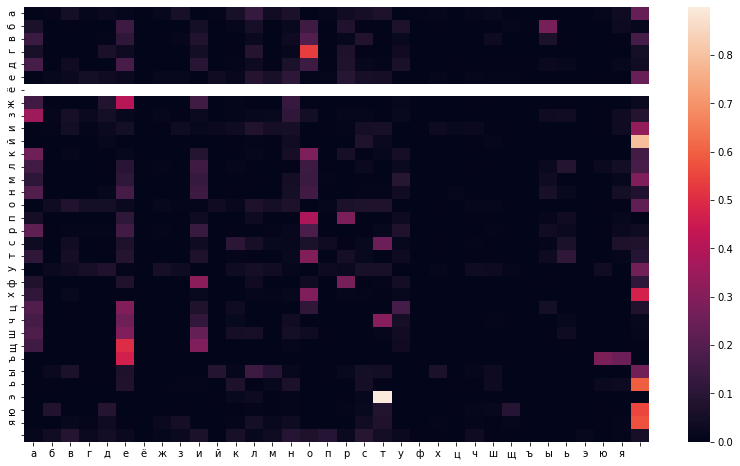

In [139]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [127]:
# Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 
start = POS['п']
end = POS['р']
prior = 1.0 / len(RUSSIAN)
for c in RUSSIAN:
    if c != ' ':
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
        if proba > 0:
            for d in RUSSIAN:
                 if d != ' ':
                    proba2 = prior * probabilities[start, POS[d]] * probabilities[POS[d], end]
                    if proba2 > 0:
                        print(''.join(['п', c, d, 'р']), proba2)


паар 6.355983300913509e-05
павр 7.824275967962348e-09
пагр 8.157068545221271e-07
паер 0.000301539610609176
паир 8.81575746485747e-06
пакр 4.911329567489884e-06
палр 1.608999017827688e-08
памр 8.758850812319131e-10
панр 1.0706042676862299e-07
паор 0.0007199950607028898
папр 1.497876812041649e-05
парр 3.6911290704446765e-06
паср 4.4033708218467607e-08
патр 2.96480508692504e-06
паур 2.1499465698457823e-05
пафр 6.352570538117333e-06
пачр 1.7569467337310998e-07
пашр 1.2751923314891131e-09
пащр 2.1390970167301647e-09
паыр 6.125119470292571e-06
паьр 1.4796970895239722e-07
паэр 5.092481815055741e-09
паяр 1.2403822299421453e-06
пвар 6.355983300913509e-05
пввр 7.824275967962348e-09
пвгр 8.157068545221271e-07
пвер 0.000301539610609176
пвир 8.81575746485747e-06
пвкр 4.911329567489884e-06
пвлр 1.608999017827688e-08
пвмр 8.758850812319131e-10
пвнр 1.0706042676862299e-07
пвор 0.0007199950607028898
пвпр 1.497876812041649e-05
пврр 3.6911290704446765e-06
пвср 4.4033708218467607e-08
пвтр 2.96480508692504

In [176]:
# Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 
start = POS['п']
end = POS['р']
prior = 1.0 / len(RUSSIAN)
for c in RUSSIAN:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        for d in RUSSIAN:
                proba2 = prior * probabilities[start, POS[d]] * probabilities[POS[d], end]
                if proba2 > 0:
                    print(''.join(['п', c, d, 'р']), proba2)

паар 6.548588855486646e-05
павр 8.061375239718782e-09
пагр 8.404252440531007e-07
паер 0.00031067717456702987
паир 9.082901630459213e-06
пакр 5.060157736201698e-06
палр 1.6577565638224666e-08
памр 9.024270533904558e-10
панр 1.1030468212524795e-07
паор 0.0007418130928454017
папр 1.5432670184671536e-05
парр 3.8029814665187574e-06
паср 4.536806301296663e-08
патр 3.054647665316708e-06
паур 2.215096465901715e-05
пафр 6.545072675636042e-06
пачр 1.8101875438441637e-07
пашр 1.3138345233524198e-09
пащр 2.2039181384492605e-09
паыр 6.3107291512105275e-06
паьр 1.524536395267123e-07
паэр 5.246799445815005e-09
паяр 1.2779695702434225e-06
пвар 6.548588855486646e-05
пввр 8.061375239718782e-09
пвгр 8.404252440531007e-07
пвер 0.00031067717456702987
пвир 9.082901630459213e-06
пвкр 5.060157736201698e-06
пвлр 1.6577565638224666e-08
пвмр 9.024270533904558e-10
пвнр 1.1030468212524795e-07
пвор 0.0007418130928454017
пвпр 1.5432670184671536e-05
пврр 3.8029814665187574e-06
пвср 4.536806301296663e-08
пвтр 3.054647

In [203]:
# Используя матрицу переходных вероятностей сгенерируем слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов
s = []
start  = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN_whitespace), p=probabilities[index])
    #if next_char != ' ':
    s.append(next_char)

print(''.join(s))

бысучиен
